# Importing Libraries

In [1]:
# Importing necessary Libraries
import numpy as np  # Importing the NumPy library for numerical operations.
import pandas as pd  # Importing the Pandas library for data manipulation and analysis.
import matplotlib.pyplot as plt  # Importing the Matplotlib library for creating visualizations.
import seaborn as sns  # Importing the Seaborn library for statistical data visualization.
from sklearn.metrics import confusion_matrix, classification_report  # Importing specific functions/classes for evaluating model performance.
import tensorflow as tf  # Importing TensorFlow, a popular open-source machine learning framework.
from tensorflow import keras  # Importing the Keras module from TensorFlow for building and training neural networks.

# Importing Data

In [2]:
#Loading Dataset
df = pd.read_csv("Customer-Churn.csv")

In [3]:
# Generating Dependent Variable Vector
Y = df.iloc[:, -1].values

# Generating Independent Variable Matrix
X = df.iloc[:, :-1].values

In [4]:
# Overview of DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# we didn't require customerID so we drop it
df = df.drop('customerID',axis=1)

In [6]:
#Information About Attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#Description of Numeric type Attributes
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The Next code snippet performs the following steps:

- Counts the occurrences of empty string values in the 'TotalCharges' column.
- Replaces empty string values with NaN values in the 'TotalCharges' column.
- Converts the data type of the 'TotalCharges' column to float for numerical analysis.

In [8]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [9]:
# checking null value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
# Select numerical variables (integer and float) from the DataFrame and store their column names in the 'num' list.
num = list(df.select_dtypes(include=['int64', 'float64']).keys())

# Select categorical variables (object/string) from the DataFrame and store their column names in the 'cat' list.
cat = list(df.select_dtypes(include='O').keys())

# Print the list of categorical variables.
print(cat)

# Print the list of numerical variables.
print(num)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
# Calculate and print the value counts of each categorical column in the DataFrame.
for i in cat:
    print(df[i].value_counts())

# Convert specific categorical values to 'No' for consistency.
df.MultipleLines = df.MultipleLines.replace('No phone service', 'No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service', 'No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service', 'No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service', 'No')
df.TechSupport = df.TechSupport.replace('No internet service', 'No')
df.StreamingTV = df.StreamingTV.replace('No internet service', 'No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service', 'No')

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [13]:
# we have to handel this all categorical variables
# there are mainly Yes/No features in most of the columns
# we will convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [14]:
# we will convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

In [16]:
from sklearn.preprocessing import LabelEncoder
# Convert columns to a common data type (either str or int)
columns_to_convert = ["InternetService", "Contract", "PaymentMethod"]  
for col in columns_to_convert:
    df[col] = df[col].astype(str)  # Convert to string

# Apply LabelEncoder
label_encoder = LabelEncoder()
for col in columns_to_convert:
    df[col] = label_encoder.fit_transform(df[col])


In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [19]:
# independent and dependent variables
x = df.drop('Churn',axis=1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(5634, 19)
(1409, 19)


In [21]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [22]:
# Specifying the optimizer (Adam in this case)
# Specifying the loss function for binary classification
# Specifying the evaluation metrics

# time for compilation of neural net.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# now we fit our model to training data
history = model.fit(xtrain, ytrain, epochs=100, verbose=0)  

In [23]:
# evalute the model
model.evaluate(xtest,ytest)

45/45 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7871


[0.44509002566337585, 0.7870830297470093]

In [24]:
# predict the churn values
ypred = model.predict(xtest)

# unscaling the ypred values
ypred_lis = []
for i in ypred:
    if i > 0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)

45/45 [==============================] - 0s 2ms/step


In [25]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
924,0,0
1051,0,1
7012,0,0
3723,0,0
4590,0,0


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1066
           1       0.57      0.49      0.53       343

    accuracy                           0.79      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Text(58.222222222222214, 0.5, 'True_number')

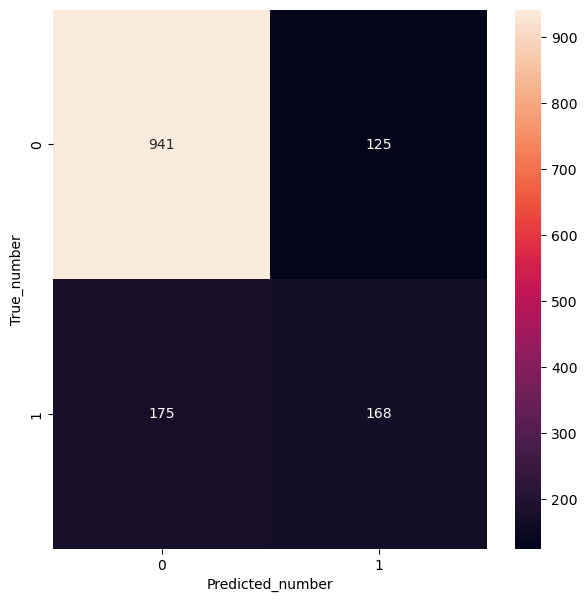

In [26]:
# checking for performance metrices
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (7,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')